In [1]:
#install necessary packages (run only once)
install.packages("arules")
install.packages("arulesViz")

Installing package into 'C:/Users/phuon/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\phuon\AppData\Local\Temp\RtmpwnpjfS\downloaded_packages


Installing package into 'C:/Users/phuon/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'arulesViz' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\phuon\AppData\Local\Temp\RtmpwnpjfS\downloaded_packages


In [2]:
library(arules)

Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write




In [34]:
#load datafrom the url
data_url = url("https://hbiostat.org/data/repo/titanic.txt") 
titanic = read.table(data_url, sep =',', header =TRUE)

In [48]:
load("titanic.raw.rdata")

titanic <- titanic.raw

In [49]:
#observe the data
##first 6 observations
head(titanic)

,Class,Sex,Age,Survived
,<fct>,<fct>,<fct>,<fct>
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
5,3rd,Male,Child,No
6,3rd,Male,Child,No


In [50]:
#types of features
str(titanic)

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age     : Factor w/ 2 levels "Adult","Child": 2 2 2 2 2 2 2 2 2 2 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# Assuming you have a DataFrame named "titanic"
titanic$survived <- ifelse(titanic$survived == 0, "No", "Yes")

In [51]:
rules = apriori(titanic)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 220 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [27 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [52]:
#dimensionality of the data
dim(titanic)

[1] 2201    4

In [53]:
inspect(rules)

     lhs                                     rhs           support   confidence
[1]  {}                                   => {Age=Adult}   0.9504771 0.9504771 
[2]  {Class=2nd}                          => {Age=Adult}   0.1185825 0.9157895 
[3]  {Class=1st}                          => {Age=Adult}   0.1449341 0.9815385 
[4]  {Sex=Female}                         => {Age=Adult}   0.1930940 0.9042553 
[5]  {Class=3rd}                          => {Age=Adult}   0.2848705 0.8881020 
[6]  {Survived=Yes}                       => {Age=Adult}   0.2971377 0.9198312 
[7]  {Class=Crew}                         => {Sex=Male}    0.3916402 0.9740113 
[8]  {Class=Crew}                         => {Age=Adult}   0.4020900 1.0000000 
[9]  {Survived=No}                        => {Sex=Male}    0.6197183 0.9154362 
[10] {Survived=No}                        => {Age=Adult}   0.6533394 0.9651007 
[11] {Sex=Male}                           => {Age=Adult}   0.7573830 0.9630272 
[12] {Sex=Female, Survived=Yes}         

In [57]:
#now let us assume, we want to see only those rules that have rhs as survived:
rules = apriori(titanic,appearance = list(rhs=c("Survived=No","Survived=Yes"),default="lhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 220 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [58]:
inspect(rules)

    lhs                                 rhs           support   confidence
[1] {Class=3rd, Sex=Male}            => {Survived=No} 0.1917310 0.8274510 
[2] {Class=3rd, Sex=Male, Age=Adult} => {Survived=No} 0.1758292 0.8376623 
    coverage  lift     count
[1] 0.2317129 1.222295 422  
[2] 0.2099046 1.237379 387  


In [59]:
#let us relax the default settings for the rules we arelooking for
rules = apriori(titanic,parameter = list(minlen=2, supp=0.05,conf=0.8),appearance = list(rhs=c("Survived=No","Survived=Yes"),default="lhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [80]:
inspect(rules)

    lhs                                   rhs            support    confidence
[1] {Class=2nd, Sex=Male}              => {Survived=No}  0.06996820 0.8603352 
[2] {Class=1st, Sex=Female}            => {Survived=Yes} 0.06406179 0.9724138 
[3] {Class=3rd, Sex=Male}              => {Survived=No}  0.19173103 0.8274510 
[4] {Class=2nd, Sex=Male, Age=Adult}   => {Survived=No}  0.06996820 0.9166667 
[5] {Class=1st, Sex=Female, Age=Adult} => {Survived=Yes} 0.06360745 0.9722222 
[6] {Class=3rd, Sex=Male, Age=Adult}   => {Survived=No}  0.17582917 0.8376623 
    coverage   lift     count
[1] 0.08132667 1.270871 154  
[2] 0.06587915 3.010243 141  
[3] 0.23171286 1.222295 422  
[4] 0.07632894 1.354083 154  
[5] 0.06542481 3.009650 140  
[6] 0.20990459 1.237379 387  


In [70]:
library(grid)

In [68]:
library(arulesViz)

Warning message:
"Unknown control parameters: type"


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


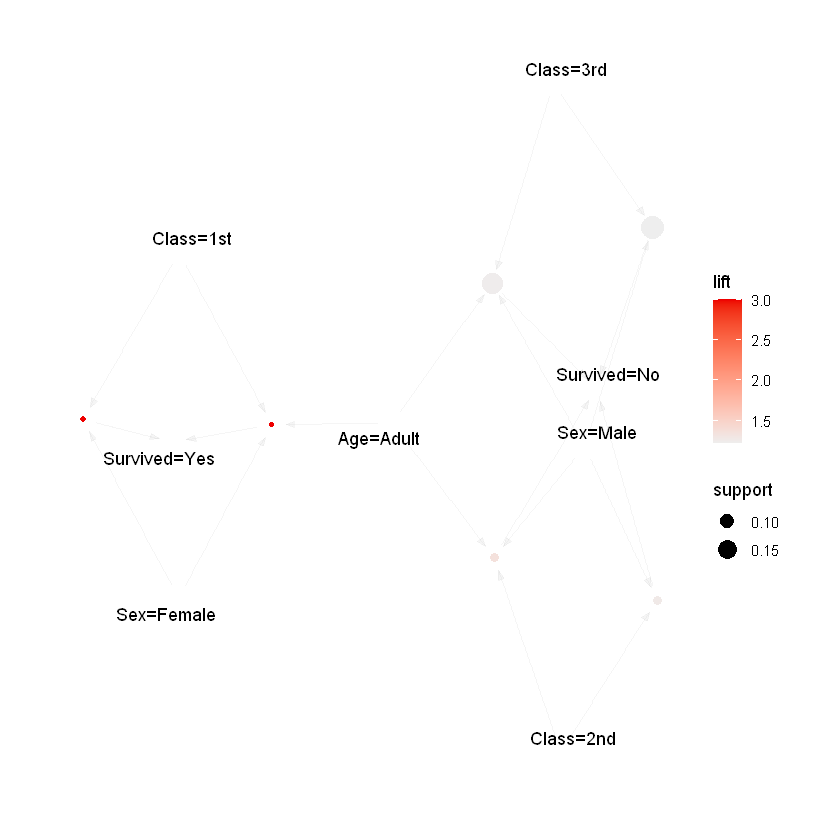

In [69]:
plot(rules, method="graph", control=list(type="items"))

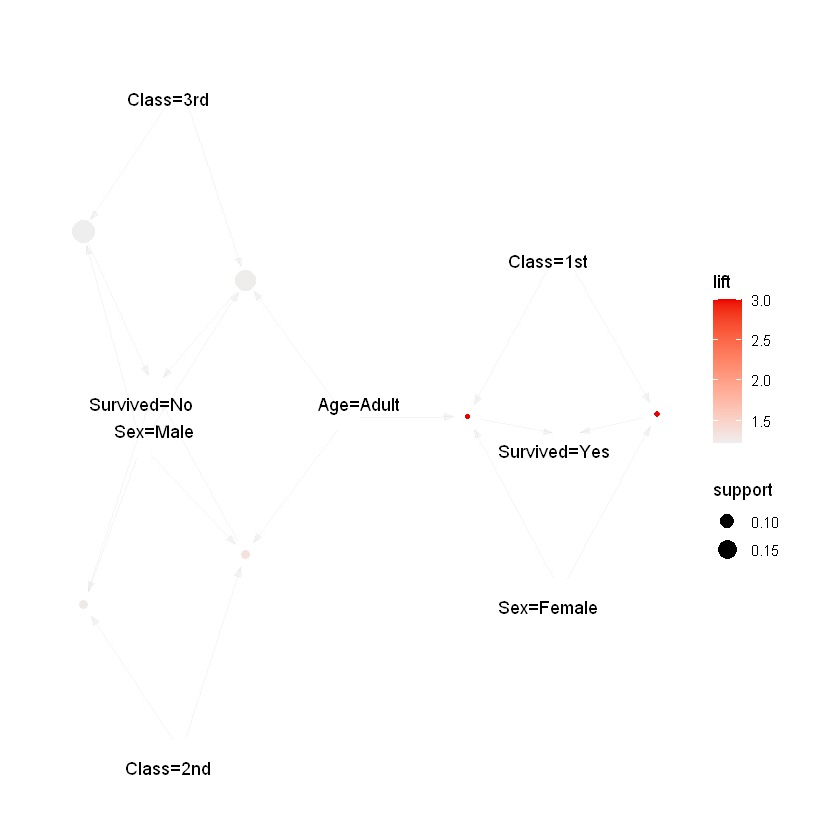

In [72]:
sort.rules <- sort(rules, by="lift")
plot(sort.rules, method="graph")

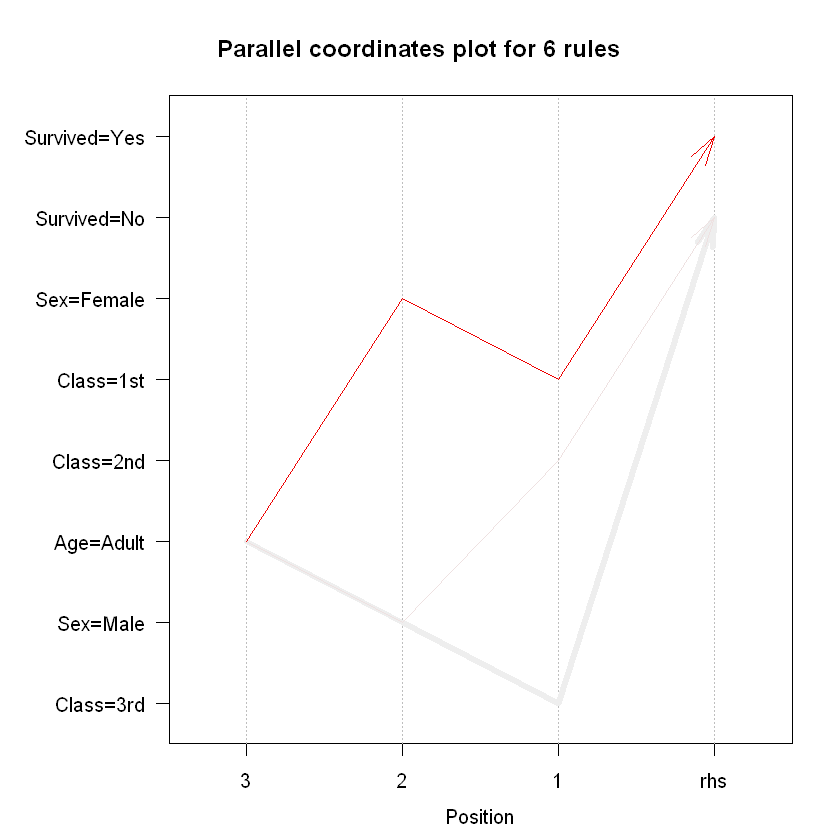

In [76]:
plot(rules, method="paracoord")

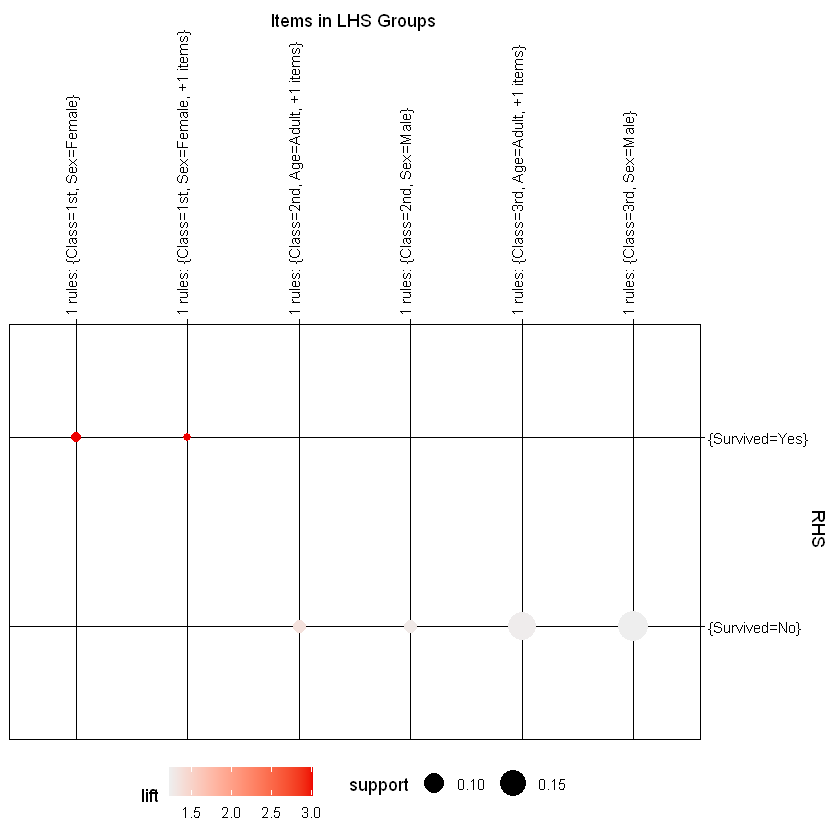

In [79]:
plot(rules, method="grouped", control=list(k=6))

# Describe the dataset

The dataset contains 2,201 observations, and 4 variables. Here is a breakdown of the 4 variables:

- Class: It has four levels, "1st," "2nd," "3rd," and "Crew," representing different classes of passengers.
- Sex: It has two levels, "Female" and "Male," representing the gender of the passengers.
- Age: It has two levels, "Adult" and "Child," indicating whether the passenger is an adult or a child.
- Survived: It has two levels, "No" and "Yes," indicating whether the passenger survived or not.

# Interprete the output 

Based on the association rules' result and graphs, we can tell that:

- Being an adult is strongly associated with a higher likelihood of survival. Also, because of the majority of passengers are adults as well, so the results showed that they have a higher proportion of survived compared to (Age=Child)

- the result shows that being a female have relatively higher likelihood of survival. The support and confidence values a high, indicating that a significant proportion of females in the dataset survived. 

- In terms of classes, passengers in 1st class and 2nd classes have a higher likelihood of survival compared to people in 3rd class. 

Overall, these rules suggest that being an adult, being female, adn being inthe higher classes (1st class and 2nd class) are generally associated with a higher likelihood of survival. 

# Task 6


The redundancy of rules refers to situations where one rule provides the same information as another rule or a subset of another rule. In other words, redundant rules do not provide any additional knowledge beyond what is already captured by other rules.

For example, if we already knew the result of  {Class=’2nd’, Age=’Child’}→ {’Survived’=’Yes’},then {Class=’2nd’, Age=’Child’,Sex=’Female’}→ {’Survived’=’Yes’} is not really necessary because not matter it is a female kid or male kid, we will still know the likelihood of their survival via this rule ({Class=’2nd’, Age=’Child’}→ {’Survived’=’Yes’}). 

In [83]:
redundant_rules = apriori(titanic,parameter = list(minlen=2, supp=0.05,conf=0.8),appearance = list(rhs=c("Survived=No","Survived=Yes"),default="lhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


## Filter out the redundancy 

In [84]:
inspect(redundant_rules)

    lhs                                   rhs            support    confidence
[1] {Class=2nd, Sex=Male}              => {Survived=No}  0.06996820 0.8603352 
[2] {Class=1st, Sex=Female}            => {Survived=Yes} 0.06406179 0.9724138 
[3] {Class=3rd, Sex=Male}              => {Survived=No}  0.19173103 0.8274510 
[4] {Class=2nd, Sex=Male, Age=Adult}   => {Survived=No}  0.06996820 0.9166667 
[5] {Class=1st, Sex=Female, Age=Adult} => {Survived=Yes} 0.06360745 0.9722222 
[6] {Class=3rd, Sex=Male, Age=Adult}   => {Survived=No}  0.17582917 0.8376623 
    coverage   lift     count
[1] 0.08132667 1.270871 154  
[2] 0.06587915 3.010243 141  
[3] 0.23171286 1.222295 422  
[4] 0.07632894 1.354083 154  
[5] 0.06542481 3.009650 140  
[6] 0.20990459 1.237379 387  


In [86]:
non_redundant_rules <- redundant_rules[!is.redundant(redundant_rules)]

In [87]:
inspect(non_redundant_rules)

    lhs                                 rhs            support    confidence
[1] {Class=2nd, Sex=Male}            => {Survived=No}  0.06996820 0.8603352 
[2] {Class=1st, Sex=Female}          => {Survived=Yes} 0.06406179 0.9724138 
[3] {Class=3rd, Sex=Male}            => {Survived=No}  0.19173103 0.8274510 
[4] {Class=2nd, Sex=Male, Age=Adult} => {Survived=No}  0.06996820 0.9166667 
[5] {Class=3rd, Sex=Male, Age=Adult} => {Survived=No}  0.17582917 0.8376623 
    coverage   lift     count
[1] 0.08132667 1.270871 154  
[2] 0.06587915 3.010243 141  
[3] 0.23171286 1.222295 422  
[4] 0.07632894 1.354083 154  
[5] 0.20990459 1.237379 387  
